### Μέλη Ομάδας:
Ον/μο1:Αλέξανδρος Κουλάκος
Αρ. Μητρώου 1:03118144

Ον/μο2:Βασίλης Βαρσαμής
Αρ. Μητρώου 2: 03118033 

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [1]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      length = len(y_true)
      right_preds = 0
      for i in range(length):
        if y_true[i] == y_pred[i]:
          right_preds += 1
      acc = right_preds/length
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [2]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 0, 0, 0, 0, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.7857142857142857
recall: 0.625
f1: 0.5636363636363637
accuracy: 0.625
Confusion matrix: 
[[4 0]
 [3 1]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [3]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [4]:
import pandas as pd
from tqdm.notebook import tqdm 

In [5]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/data.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()
# print(list(data.head().itertuples(index=True, name='Pandas')))

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [6]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [12]:
import math
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]
# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below
length = len(data)
count  = 0
limit = math.ceil(0.7 * length)
data_list = list(data.itertuples(index=False, name='Pandas')) 
# itertuples() method returns by default an object of class 'map',
# therefore this object must be converted to list, 
# so that we can randomly select items from it in constant time.

seen = set() 
# Set seen stores the instance_id of each track we add to x_train. 
# Attribute instance_id is unique for each track, 
# so by using set seen we can check whether our randomised algorithm 
# selects entirely new tracks.

# Fill x_train and y_train randomly
while (count < limit):
  row = random.choice(data_list)
  instance_id = getattr(row, 'instance_id')
  
  if instance_id not in seen:
    l = []
    for input in inputs:
      l.append(getattr(row, input))
    x_train.append(l)
    y_train.append(genres_to_id[getattr(row, output)])
    seen.add(instance_id)
    count += 1

# Fill x_test and y_test with the remaining elements from data_list 
for row in data_list:
  instance_id = getattr(row, 'instance_id')

  if instance_id not in seen:
    l = []
    for input in inputs:
      l.append(getattr(row, input))
    x_test.append(l)
    y_test.append(genres_to_id[getattr(row, output)])

# Randomly distribute all elements in list x_test,
# so that accuracy measurements of KNN are reliable

## Your code above
##################

In [13]:
# ----- Testing test set ----- #
print(x_test)
print(y_test)

# ----- Testing train set ----- #
print(x_train)
print(y_train)

electronic, rap, rock = 0, 0, 0

for y in y_train:
  if y == 0:
    electronic += 1
  elif y == 1:
    rock += 1
  else:
    rap += 1

electronic_percent = 100 * (electronic / 4466)
rap_percent = 100 * (rap / 4561)
rock_percent = 100 * (rock / 4504)

print("Electronic:", electronic, "({}%)".format(int(electronic_percent)))
print("Rap", rap, "({}%)".format(int(rap_percent)))
print("Rock", rock, "({}%)".format(int(rock_percent)))

print("Total", electronic + rap + rock)

[[0.0030600000000000002, 0.62, 0.755, 0.0118, 0.534, 0.0345], [0.855, 0.607, 0.158, 0.0, 0.106, 0.0345], [0.000194, 0.601, 0.9690000000000001, 0.7759999999999999, 0.409, 0.185], [0.136, 0.336, 0.746, 0.0, 0.737, 0.0685], [0.158, 0.66, 0.784, 0.000279, 0.0978, 0.0571], [0.0281, 0.6559999999999999, 0.653, 0.858, 0.1119999999999999, 0.0396], [0.00804, 0.516, 0.92, 0.614, 0.8009999999999999, 0.0942], [0.0236, 0.715, 0.978, 0.000493, 0.21600000000000003, 0.36200000000000004], [0.0036200000000000004, 0.713, 0.8240000000000001, 0.49200000000000005, 0.311, 0.0409], [0.18100000000000002, 0.611, 0.6759999999999999, 5.35e-06, 0.139, 0.0461], [0.1689999999999999, 0.685, 0.909, 0.000663, 0.9420000000000001, 0.043], [0.00409, 0.721, 0.938, 0.275, 0.38, 0.0921], [0.0579999999999999, 0.815, 0.509, 0.877, 0.0954, 0.0486], [0.0662, 0.515, 0.998, 0.521, 0.521, 0.156], [0.0084599999999999, 0.583, 0.6729999999999999, 0.8290000000000001, 0.303, 0.0268], [0.0151, 0.728, 0.902, 0.00144, 0.361, 0.1969999999999

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [14]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
print("x_train list:", "number of rows =", len(x_train), ", number of columns =", len(x_train[0]))
print("y_train list:", "number of elements =", len(y_train))
print("x_test list:", "number of rows =", len(x_test), ", number of columns =", len(x_test[0]))
print("y_test list:", "number of elements =", len(y_test))
print()
print("Total number of tracks to be classified =", length)
print("Total number of rows of x_train and x_test list =", len(x_train) + len(x_test))
## Your code above
##################

x_train list: number of rows = 9472 , number of columns = 6
y_train list: number of elements = 9472
x_test list: number of rows = 4059 , number of columns = 6
y_test list: number of elements = 4059

Total number of tracks to be classified = 13531
Total number of rows of x_train and x_test list = 13531


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [15]:
# Range of x_train, x_test columns

##################
## Your code below
data_frame_train = pd.DataFrame(x_train,columns=inputs)

print("Train set")
for input in inputs:
  lower_bound = data_frame_train[input].min()
  upper_bound = data_frame_train[input].max()
  range_train = upper_bound - lower_bound
  print("{0}: [{1}, {2}], range = {3}".format(input, lower_bound, upper_bound, range_train))

print()

data_frame_test = pd.DataFrame(x_test,columns=inputs)

print("Test set")
for input in inputs:
  lower_bound = data_frame_test[input].min()
  upper_bound = data_frame_test[input].max()
  range_test = upper_bound - lower_bound
  print("{0}: [{1}, {2}], range = {3}".format(input, lower_bound, upper_bound, range_test))
## Your code above
##################

Train set
acousticness: [1.6e-06, 0.9940000000000001], range = 0.9939984000000001
danceability: [0.0645, 0.977], range = 0.9125
energy: [0.00259, 0.998], range = 0.99541
instrumentalness: [0.0, 0.98], range = 0.98
liveness: [0.0173, 0.991], range = 0.9737
speechiness: [0.0224, 0.922], range = 0.8996000000000001

Test set
acousticness: [1.39e-06, 0.9940000000000001], range = 0.9939986100000001
danceability: [0.10400000000000001, 0.975], range = 0.871
energy: [0.0231, 0.9990000000000001], range = 0.9759000000000001
instrumentalness: [0.0, 0.986], range = 0.986
liveness: [0.0194, 0.973], range = 0.9536
speechiness: [0.0233, 0.883], range = 0.8597


In [16]:
# Εναλλακτικά, η ελάχιστη και μέγιστη τιμή κάθε χαρακτηριστικού
# του train set φαίνεται από τον παρακάτω πίνακα ο οποίος 
# προκύπτει καλώντας τη μέθοδο data_frame_train.describe()

data_frame_train.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness
count,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000
mean,0.160815,0.618773,0.693634,0.136597,0.199644,0.113663
std,0.216546,0.155604,0.186033,0.276835,0.160649,0.113410
min,0.000002,0.064500,0.002590,0.000000,0.017300,0.022400
25%,0.008828,0.516000,0.564000,0.000000,0.098200,0.038200
50%,0.059900,0.626000,0.710000,0.000081,0.130500,0.060400
75%,0.234250,0.732000,0.844000,0.058575,0.261250,0.150250
max,0.994000,0.977000,0.998000,0.980000,0.991000,0.922000


In [18]:
# Εναλλακτικά, η ελάχιστη και μέγιστη τιμή κάθε χαρακτηριστικού
# του test set φαίνεται από τον παρακάτω πίνακα ο οποίος 
# προκύπτει καλώντας τη μέθοδο data_frame_test.describe()

data_frame_test.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness
count,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000
mean,0.164308,0.618050,0.687940,0.138184,0.192926,0.110914
std,0.222719,0.153238,0.186955,0.278784,0.157399,0.111741
min,0.000001,0.104000,0.023100,0.000000,0.019400,0.023300
25%,0.009275,0.517500,0.553000,0.000000,0.095800,0.038200
50%,0.057600,0.622000,0.703000,0.000096,0.128000,0.058300
75%,0.229000,0.729000,0.842000,0.066500,0.245000,0.141000
max,0.994000,0.975000,0.999000,0.986000,0.973000,0.883000


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

## Σχολιασμός

Σχετικά με το Μέρος 1, που αφορά την κατασκευή των train και test set, έχουμε να κάνουμε τις εξής παρατηρήσεις:

1.   Για να λειτουργούν αποδοτικά και αξιόπιστα όλες οι μέθοδοι ταξινόμησης, είναι απαραίτητο τα tracks που ανήκουν στο train set να επιλέγονται κατά ομοιόμορφο τρόπο από τις τρεις δυνατές κλάσεις (Electronic, Rock, Rap). Προς το σκοπό αυτό, περιορίζουμε το δοσμένο αρχείο .csv, ώστε να περιέχει μόνο tracks των ειδών Electronic, Rock ή Rap και στη συνέχεια επιλέγουμε **με τυχαίο τρόπο** κομμάτια από τα διαθέσιμα δεδομένα, έως ότου το μήκος της λίστας `x_train` ή `y_train` ξεπεράσει το $\lceil 0.7 \cdot 13531 \rceil = \lceil 9471.7 \rceil = 9472$. Πράγματι, είναι εύκολο να ελέγξουμε ότι στο train set εμφανίζονται κατά ομοιόμορφο τρόπο κομμάτια από κάθε κατηγορία. Χρησιμοποιώντας $Ctrl + F$ στη στήλη *music_genre*  του περιορισμένου αρχείου .csv μπορούμε να δούμε ότι συνολικά υπάρχουν 4466 κομμάτια τύπου Electronic, 4561 τύπου Rock και 4504 τύπου Rap. Με ένα γραμμικό πέρασμα της λίστας `y_train` βρίσκουμε το πλήθος εμφανίσεων κάθε κατηγορίας στο train set. Συγκεκριμένα, έχουμε ότι το $70\%$ των κομματιών προς εκπαίδευση είναι τύπου Electronic (σε σχέση με όλα τα κομμάτια τύπου Electronic που εμφανίζονται στο αρχείο .csv), το $69\%$ είναι τύπου Rap (σε σχέση με όλα τα κομμάτια τύπου Rap που εμφανίζονται στο αρχείο .csv) και το $70\%$ είναι τύπου Rock (σε σχέση με όλα τα κομμάτια τύπου Rock που εμφανίζονται στο αρχείο .csv). Τα ποσοστά αυτά είναι πολύ παραπλήσια, γεγονός που πιστοποιεί την ποικιλία και ομοιομορφία του train set ως προς το πλήθος των κλάσεων που περιλαμβάνει. Έχοντας συμπληρώσει ορθά το train set, είναι πολύ εύκολο να συμπληρώσουμε το test set περιλαμβάνοντας σε αυτό ό,τι δεν ανήκει στο train set. Ο έλεγχος του ανήκειν γίνεται πολύ εύκολα σε χρόνο $O(1)$ με τη βοήθεια του συνόλου `seen`. 
 
2.   Όσον αφορά τα πεδία τιμών των χαρακτηριστικών, παρατηρούμε ότι αυτά πράγματι ανήκουν στο διάστημα $[0,1]$ τόσο για τα στοιχεία του train set όσο και για τα στοιχεία του test set. Επίσης, σημειώνουμε ότι τα χαρακτηριστικά των κομματιών που ανήκουν στο train set έχουν εύρη παρόμοιας τάξης μεγέθους (0.9 και άνω) και αντιστοίχως τα χαρακτηριστικά των κομματιών που ανήκουν στο test set έχουν εύρη παρόμοιας τάξης μεγέθους (0.84 και άνω). Σε κάθε περίπτωση, ανεξαρτήτως train set και test set, είναι φανερό ότι τα χαρακτηριστικά όλων των κομματιών έχουν πολύ πλούσιο εύρος που σε ορισμένες περιπτώσεις πλησιάζει σημαντικά τη μονάδα. Το γεγονός αυτό είναι πολύ σημαντικό για τη συνέχεια, διότι εξασφαλίζει πως κάθε χαρακτηριστικό έχει περίπου την ίδια συνεισφορά στη συμπεριφορά του ταξινομητή, όπως και θα έπρεπε. 



# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [32]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      size = len(row1)

      if self.distance=='euclidean':
        ##################
        ## Your code below
        l = []
        for i in range(size):
          l.append(row1[i] - row2[i])
        
        dist = np.linalg.norm(l)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        product = 0
        for i in range(size):
          product += row1[i] * row2[i]
        
        dist = 1 - product / (np.linalg.norm(row1) * np.linalg.norm(row2))
        ## Your code above
        ##################

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = []
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for d in x:
        distances.append(self.get_distance(row,d))
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below
      freq = dict()
      freq[0], freq[1], freq[2] = 0, 0, 0
      
      for label in nn_labels:
        freq[label] += 1
      prediction = max(freq, key=freq.get)
      ## Your code above
      ###################
      return prediction

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [31]:
def choose_random(bound, x, y):
  attrs, labels = [], []
  count = 0

  seen = set()

  while (count < bound):
    index = random.randint(0, len(x) - 1)
    d = x[index]
    
    if index not in seen:
      attrs.append(d)
      labels.append(y[index])
      seen.add(index)
      count += 1
  
  return attrs, labels, seen


In [33]:
bound = 100

attrs, labels = choose_random(bound, x_test, y_test)[:2]

In [34]:
knn = KNN(x_train, y_train, k=5, distance='euclidean')

preds = [knn.classify(a) for a in attrs]

eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7293970219666814
recall: 0.7249602840855994
f1: 0.7206679247440956
accuracy: 0.72
Confusion matrix: 
[[28  9  4]
 [ 5 22  2]
 [ 1  7 22]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)

knc.fit(x_train, y_train)

y_pred = knc.predict(attrs)

eval = Evaluate(labels, y_pred)
eval.get_evaluation_report()

precision: 0.7293970219666814
recall: 0.7249602840855994
f1: 0.7206679247440956
accuracy: 0.72
Confusion matrix: 
[[28  9  4]
 [ 5 22  2]
 [ 1  7 22]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [36]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(attr) for attr in attrs]

CPU times: user 14.1 s, sys: 1.4 s, total: 15.5 s
Wall time: 14.1 s


In [38]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(attr) for attr in attrs]

CPU times: user 25.1 s, sys: 2.23 s, total: 27.4 s
Wall time: 25.1 s


In [39]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(attrs)

CPU times: user 43.1 ms, sys: 0 ns, total: 43.1 ms
Wall time: 42.3 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [40]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(attr) for attr in attrs]

CPU times: user 14 s, sys: 1.22 s, total: 15.2 s
Wall time: 14 s


In [41]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(attr) for attr in attrs]

CPU times: user 23.9 s, sys: 1.72 s, total: 25.6 s
Wall time: 24 s


In [42]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(attrs)

CPU times: user 39.1 ms, sys: 820 µs, total: 39.9 ms
Wall time: 40.3 ms


## Σχολιασμός
Αναφορικά με το μέρος 2, παρατηρούμε τα εξής:

1.   Η δική μας υλοποίηση συμφωνεί απόλυτα με την έτοιμη όσον αφορά τις επιδόσεις που πετυχαίνει (φαίνεται από το γεγονός ότι έχουν πανομοιότυπο confusion matrix). Αυτό οφείλεται στο ότι επιλέγουμε στην τύχη $100$ στοιχεία με τα οποία τεστάρουμε τους ταξινομητές, αλλά αυτά τα στοιχεία είναι κοινά και για τις δύο υλοποιήσεις.
2. Παρατηρούμε ότι όσο αυξάνεται το k, ο χρόνος εκτέλεσης παρουσιάζει αμελητέα αύξηση και αυτό είναι λογικό, διότι ανεξαρτήτως του k ο αλγόριθμος θα υπολογίσει την απόσταση του διανύσματος εισόδου με όλα τα στοιχεία του train set, θα ταξινομήσει αυτή τη λίστα και θα επιλέξει τους δείκτες των k μικρότερων στοιχείων. Στη συνέχεια, θα βρει ποια κλάση εμφανίζεται συχνότερα ανάμεσα σε αυτά τα k κομμάτια (πλειοψηφία) και θα κατατάξει το διάνυσμα εισόδου σε αυτή. Επομένως, το μόνο που θα "πληρώσουμε" παραπάνω είναι η διάσχιση και το slice της λίστας μεγέθους k.

3.  Αφού έχουμε $3$ κλάσεις (και υποθέτοντας ότι στο train set εμφανίζονται όλες ομοιόμορφα) είναι καλό το k να μην είναι πολλαπλάσιο του 3, γιατί έτσι αποκλείεται η περίπτωση να υπάρχει ισοβαθμία (ίδια συχνότητα εμφάνισης) ανάμεσα στις κλάσεις.
4.  Με βάση τα παραπάνω κελιά, παρατηρούμε ότι όταν τεστάρουμε τον ταξινομητή με την απόσταση συνημιτόνου έχουμε αύξηση στο χρόνο εκτέλεσης σχεδόν κατά 100%. Αυτό δικαιολογείται, γιατί στην απόσταση συνημιτόνου καλούμε διπλάσιες φορές την συνάρτηση `np.linalg.norm()` σε σχέση με την ευκλείδεια. Η συνάρτηση αυτή μπορεί να αργήσει πολύ (μεγάλο overhead) ακόμα και για μικρούς πίνακες.
5.  Παρατηρούμε μεγάλη μείωση του χρόνου εκτέλεσης όταν χρησιμοποιούμε την έτοιμη υλοποίηση του KNN (ελάττωση σχεδόν κατά 4 τάξεις μεγέθους!). Αυτό οφείλεται στις βελτιστοποιήσεις που εφαρμόζει η έτοιμη βιβλιοθήκη `scikit-learn`. Σημειώνουμε ότι by default η έτοιμη υλοποίηση θεωρεί την ευκλείδεια απόσταση ως μετρική.





# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [43]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακριτή σε διαστήματα 
def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)
#x[i][j] i is for the (i+1)-th track x[i][j] is either 0 or 1 
#It is 0 if the (j/5 + 1) characteristic is not in the range that the (j mod 5 + 1)-th bin commands
#it is 1 otherwise.
#remember indices at an array start from 0

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [46]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres))) # 30 x 3 array
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        my_arr = self.pC
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below

        for count,l in enumerate(self.x):
            self.pxC[:,self.y[count]] += l
        self.pxC[:,] /= my_arr
        return self.pxC
        
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below

          for j in range(xsize):
            if(x[j] == 1):
              pcX[i] *= self.pxC[j][i]
            else:
              pcX[i] *= 1-self.pxC[j][i]
          
        pcX *= self.pC

          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [47]:
def make_lists(x, y, seen):
  l_x_test = []
  l_y_test = []
  
  for i in seen:
    l_x_test.append(x[i])
    l_y_test.append(y[i])

  return l_x_test, l_y_test


In [48]:
bound = 100

attrs, labels, seen = choose_random(bound, x_test_r, y_test)
gauss_attrs, gauss_labels = make_lists(x_test,y_test,seen)

In [49]:
y_train = np.array(y_train)
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in attrs]
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7394179894179894
recall: 0.7350334205172914
f1: 0.7302041827063777
accuracy: 0.73
Confusion matrix: 
[[24  9  4]
 [ 1 24  7]
 [ 3  3 25]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(gauss_attrs)

eval = Evaluate(gauss_labels, y_pred)
eval.get_evaluation_report()

precision: 0.751190137505927
recall: 0.736441078174949
f1: 0.7304036153966026
accuracy: 0.73
Confusion matrix: 
[[23  7  7]
 [ 1 25  6]
 [ 1  5 25]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [51]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in attrs]

CPU times: user 65 ms, sys: 0 ns, total: 65 ms
Wall time: 68.6 ms


In [52]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(gauss_attrs)

CPU times: user 21.5 ms, sys: 40 µs, total: 21.6 ms
Wall time: 22.3 ms


## Σχολιασμός
Αναφορικά με το Μέρος 3, παρατηρούμε τα εξής:


1.   Χρησιμοποιούμε πάλι την συνάρτηση που φτιάξαμε στο 2ο μέρος (`choose_random()`) που επιλέγει τυχαία τα στοιχεία του test set (αλλάζοντας την μεταβλητή `bound`, μεγαλώνουμε ή μικραίνουμε το test set κατά βούληση)
2. Παρατηρούμε ότι τόσο η δικιά μας όσο και η έτοιμη υλοποίηση έχουν ικανοποιητική επίδοση, διότι όπως βλέπουμε και από τον confusion matrix τα στοιχεία εκτός διαγωνίου έχουν μικρότερη τιμή σε σχέση με αυτά της διαγωνίου.
3. Οι δύο υλοποίήσεις έχουν πολύ κοντινές επιδόσεις μεταξύ τους και αυτό οφείλεται πάλι στο γεγονός ότι καταρχάς κάνουμε test με το ίδιο ακριβώς σύνολο, το οποίο το επιλέγουμε τυχαία. Σημειώνουμε ότι με την τεχνική data binning πετυχαίνουμε λίγο καλύτερα αποτελέσματα διότι, με την υπόθεση των συνεχών δεδομένων και της συνεχούς κατανομής υπάρχει περίπτωση η πιθανότητα κάποιο στοιχείο να έχει μια συγκεκριμένη τιμή (σύμφωνα με την υποτιθέμενη κατανομή) να μην αντιπροσωπεύει σε ικανοποιητικό βαθμό το πραγματικό μας dataset.
4. Κάνουμε την παραδοχή ότι τα χαρακτηριστικά είναι ανεξάρτητα μεταξύ τους, για να μπορούμε να πάρουμε το γινόμενο των πιθανοτήτων που βρίσκεται στον αριθμητή(σε αυτό εξάλλου οφείλεται και ο χαρακτηρισμός Naive στον τίτλο του ταξινομητή).Αυτή η υπόθεση όταν πρόκειται για πραγματικά δεδομένα είναι πολύ ισχυρή και πρακτικά μη ρεαλιστική. Ενδεικτικά αναφέρουμε εδώ ότι π.χ αν ένα τραγούδι έχει υψηλό danceability, τότε αναμένουμε να έχει και υψηλό energy.
5. Παρατηρούμε διπλάσιο χρόνο εκτέλεσης της δικιάς μας υλοποίησης σε σχέση με την έτοιμη (παρόλα αυτά εδώ η τάξη μεγέθους δεν αλλάζει, έχουμε ms και στα δύο).Αυτό υποθέτουμε ότι οφείλεται πάλι στις βελτιστοποιήσεις που κάνει η GaussianNB.

6. Αναφορικά με την παρατήρηση 3, παρουσιάζουμε το εξής ανάλογο: Το data binning είναι ισοδύναμο με την κατασκευή ιστογράμματος συχνοτήτων εμφάνισης για τα δεδομένα. Ξέρουμε ότι αυτό το ιστόγραμμα μπορεί να προσσεγιστεί από μια κανονική κατανομή (Κεντρικό Οριακό Θεώρημα από Θεωρία Πιθανοτήτων). Παρόλα αυτά, η προσέγγιση αυτή δεν είναι πάντα καλή και εξαρτάται από το πλήθος των δεδομένων που έχουμε. Σε κάθε περίπτωση, το ιστόγραμμα είναι μια πιο ακριβής αναπαράσταση των συχνοτήτων σε σχέση με την κανονική κατανομή. Η τελευταία, όμως, μπορεί να προσσεγγίσει το ιστόγραμμα ικανοποιητικά. Έτσι εξηγούνται: α) το καλύτερο accuracy όταν εφαρμόζουμε την τεχνική data binning, β) οι πολύ κοντινές επιδόσεις που πετυχαίνουμε με την κανονική κατανομή.

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [53]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [54]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [55]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input, self.weights) + self.biases
        
        ## Your code above
        ##################
        return output
        

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [56]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [57]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
             
            activations.append(l.forward(input))
            input = activations[-1]

            ## Your code above
            ##################  

        # print(activations[len(activations) - 1])        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

In [58]:
from IPython.display import clear_output
import numpy as np

# A function that trains MLP network with data from train set using a specified number of epochs.
# It also plots the results of the classification regarding the final epoch.

def train_neural(network, epochs, x_train, y_train, x_test, y_test, display=True):
  train_log = []
  val_log = []

  for epoch in range(epochs):
      network.fit(x_train, y_train)

      if (display):   
        train_log.append(np.mean(network.predict(x_train) == y_train))
        val_log.append(np.mean(network.predict(x_test) == y_test))
        clear_output()
        print("Epoch", epoch)
        print("Train accuracy:", train_log[-1])
        print("Val accuracy:", val_log[-1])  
        plt.plot(train_log,label = 'train accuracy')
        plt.plot(val_log,label = 'val accuracy')
        plt.legend(loc = 'best')
        plt.grid()
        plt.show()
    
  y_pred = network.predict(x_test)

  eval = Evaluate(y_test, y_pred)
  eval.get_evaluation_report()

Epoch 24
Train accuracy: 0.5295608108108109
Val accuracy: 0.5407735895540774


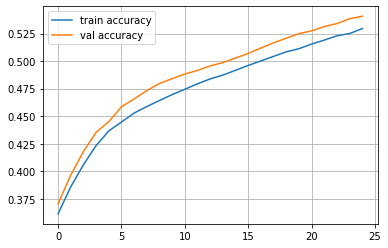

precision: 0.5472738129251593
recall: 0.5366206647512921
f1: 0.5144011194851151
accuracy: 0.5407735895540774
Confusion matrix: 
[[ 670  510  159]
 [  93 1156  140]
 [ 422  540  369]]


In [59]:
network = MLP([10, 15, 20, 3], len(inputs))

train_neural(network, 25, np.array(x_train), np.array(y_train), x_test, y_test)

Epoch 49
Train accuracy: 0.6766258445945946
Val accuracy: 0.6659275683665927


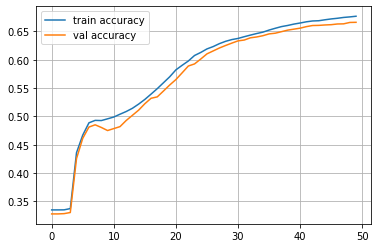

precision: 0.6852392318700579
recall: 0.666317070589137
f1: 0.6645290791650766
accuracy: 0.6659275683665927
Confusion matrix: 
[[ 743  232  364]
 [ 156  909  324]
 [  35  245 1051]]


In [60]:
network = MLP([10, 15, 20, 3], len(inputs))

train_neural(network, 50, np.array(x_train), np.array(y_train), x_test, y_test)

Epoch 199
Train accuracy: 0.6909839527027027
Val accuracy: 0.6908105444690811


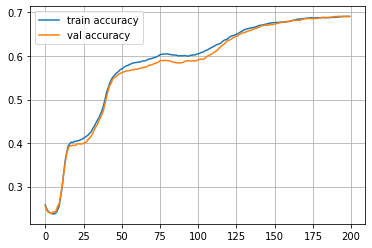

precision: 0.7158010959235265
recall: 0.6898247695118744
f1: 0.6854047785066172
accuracy: 0.6908105444690811
Confusion matrix: 
[[ 672  392  275]
 [ 115 1090  184]
 [  23  266 1042]]


In [61]:
network = MLP([10, 15, 20, 3], len(inputs))

train_neural(network, 200, np.array(x_train), np.array(y_train), x_test, y_test)

Epoch 24
Train accuracy: 0.6646959459459459
Val accuracy: 0.6558265582655827


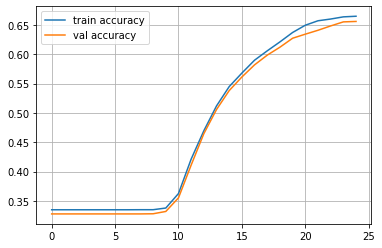

precision: 0.6718999667729642
recall: 0.657695231822467
f1: 0.6529967424358145
accuracy: 0.6558265582655827
Confusion matrix: 
[[ 817  225  297]
 [ 181  741  467]
 [  71  156 1104]]


In [62]:
network = MLP([100, 200, 100, 10], len(inputs))

train_neural(network, 25, np.array(x_train), np.array(y_train), x_test, y_test)

Epoch 49
Train accuracy: 0.667018581081081
Val accuracy: 0.6612466124661247


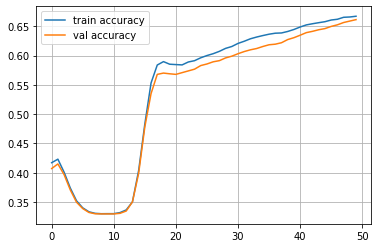

precision: 0.6854110718109867
recall: 0.6623924139213023
f1: 0.6571960083991247
accuracy: 0.6612466124661247
Confusion matrix: 
[[ 717  219  403]
 [ 165  833  391]
 [  35  162 1134]]


In [63]:
network = MLP([100, 200, 100, 10], len(inputs))

train_neural(network, 50, np.array(x_train), np.array(y_train), x_test, y_test)

Epoch 199
Train accuracy: 0.668285472972973
Val accuracy: 0.6671593988667159


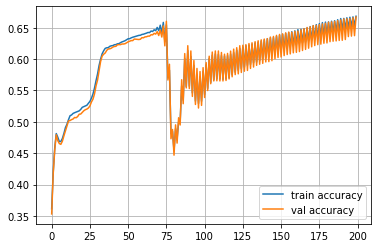

precision: 0.7419670151152119
recall: 0.663974968495182
f1: 0.6653642047615317
accuracy: 0.6671593988667159
Confusion matrix: 
[[ 706  527  106]
 [  92 1258   39]
 [  31  556  744]]


In [64]:
network = MLP([100, 200, 100, 10], len(inputs))

train_neural(network, 200, np.array(x_train), np.array(y_train), x_test, y_test)

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [65]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(np.array(x_train), np.array(y_train))

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.730863805728928
recall: 0.7095746876648237
f1: 0.7090684274699139
accuracy: 0.7110125646711013
Confusion matrix: 
[[ 764  380  195]
 [ 142 1152   95]
 [  53  308  970]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


**25 εποχές**

In [66]:
network = MLP([10, 15, 20, 3], len(inputs))

%time train_neural(network, 25, np.array(x_train), np.array(y_train), x_test, y_test, display=False)

precision: 0.5113315856150552
recall: 0.5135887628660621
f1: 0.46193397156394883
accuracy: 0.50849963045085
Confusion matrix: 
[[979 101 259]
 [583 177 629]
 [360  63 908]]
CPU times: user 686 ms, sys: 470 ms, total: 1.16 s
Wall time: 604 ms


In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = 25)

%time mlp.fit(np.array(x_train), np.array(y_train))

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

CPU times: user 1.17 s, sys: 3.16 ms, total: 1.18 s
Wall time: 1.19 s
precision: 0.7258072825111407
recall: 0.7076592807806877
f1: 0.7075300324570554
accuracy: 0.7090416358709042
Confusion matrix: 
[[ 782  366  191]
 [ 153 1141   95]
 [  69  307  955]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**50 εποχές**

In [68]:
network = MLP([10, 15, 20, 3], len(inputs))

%time train_neural(network, 50, np.array(x_train), np.array(y_train), x_test, y_test, display=False)

precision: 0.6383322233322233
recall: 0.5558763932665151
f1: 0.5410645914247899
accuracy: 0.5550628233555063
Confusion matrix: 
[[ 437  384  518]
 [  49  737  603]
 [   8  244 1079]]
CPU times: user 1.33 s, sys: 882 ms, total: 2.21 s
Wall time: 1.16 s


In [69]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = 50)

%time mlp.fit(np.array(x_train), np.array(y_train))

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

CPU times: user 2.3 s, sys: 761 µs, total: 2.3 s
Wall time: 2.31 s
precision: 0.7414756841082587
recall: 0.732893165468448
f1: 0.7336586979617029
accuracy: 0.7334318797733432
Confusion matrix: 
[[ 872  308  159]
 [ 178 1086  125]
 [  70  242 1019]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**200 εποχές**

In [70]:
network = MLP([10, 15, 20, 3], len(inputs))

%time train_neural(network, 200, np.array(x_train), np.array(y_train), x_test, y_test, display=False)

precision: 0.6937387154626862
recall: 0.6746824038683537
f1: 0.6725595903244868
accuracy: 0.6757822123675782
Confusion matrix: 
[[ 708  347  284]
 [ 130 1072  187]
 [  59  309  963]]
CPU times: user 5.13 s, sys: 3.56 s, total: 8.7 s
Wall time: 4.52 s


In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = 200)

%time mlp.fit(np.array(x_train), np.array(y_train))

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

CPU times: user 9.23 s, sys: 0 ns, total: 9.23 s
Wall time: 9.24 s
precision: 0.7490333060488963
recall: 0.7440647731019109
f1: 0.7443660669305644
accuracy: 0.7442719881744272
Confusion matrix: 
[[ 896  294  149]
 [ 180 1068  141]
 [  76  198 1057]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σχολιασμός

Για την αξιολόγηση του MLP, πειραματιζόμαστε με ένα "μικρό" νευρωνικό δίκτυο (το οποίο έχει δομή `shapes = [10, 15, 20, 3]`) και ένα "μεγάλο" νευρωνικό δίκτυο (το οποίο έχει δομή `shapes = [100, 200, 100, 10]`). Αναφορικά με το "μικρό" δίκτυο, καθώς αυξάνουμε το πλήθος των εποχών (π.χ. από 25 σε 50), η επίδοση του ταξινομητή (που εκτιμάται με βάση το μέγεθος `accuracy`) βελτιώνεται (το `accuracy` από 0.5 ανεβαίνει στο 0.55). Σημαντική βελτίωση στην επίδοση του ταξινομητή συμβαίνει όταν αυξάνουμε το πλήθος των εποχών π.χ. από 50 σε 200 (όπου το `accuracy` από 0.55 ανεβαίνει στο 0.67). Αναφορικά με το "μεγάλο" δίκτυο, καθώς αυξάνουμε το πλήθος των εποχών δε σημειώνεται περαιτέρω σημαντική βελτίωση της επίδοσης του ταξινομητή (το `accuracy` παραμένει πρακτικά σταθερό) και αυτό σημαίνει ότι πρακτικά ο perceptron προσεγγίζει τη μέγιστη σύγκλιση κατά την εποχή 25. Με βάση τις προηγούμενες μετρήσεις, φαίνεται ότι καθώς αυξάνουμε το πλήθος των εποχών, αυξάνεται και η επίδοση του ταξινομητή. Ωστόσο, κάτι τέτοιο συνέβη τυχαία, διότι έχοντας επαναλάβει στο παρελθόν αυτές τις μετρήσεις για πολλά και διαφορετικά πειράματα, μπορούμε να συμπεράνουμε ότι ανεξαρτήτως του μεγέθους του δικτύου, δεν υπάρχει καμία εγγύηση να ικανοποιείται η λογική απαίτηση ότι καθώς αυξάνεται το πλήθος των εποχών, θα αυξάνεται και η επίδοση του ταξινομητή. Αυτή η παρατήρηση αποτελεί εγγενή ιδιότητα της υλοποίησής μας και οφείλεται εν μέρει στο ότι χρησιμοποιούμε σταθερό βήμα εκπαίδευσης το οποίο δεν εξασφαλίζει προσανατολισμένη κίνηση στο χώρο αναζήτησης προς το σημείο σύγκλισης.

Αντίθετα, η παραπάνω απαίτηση ικανοποιείται από την έτοιμη υλοποίηση της βιβλιοθήκης `scikit-learn` η οποία εφαρμόζει διάφορες τεχνικές βελτιστοποίησης (π.χ. adaptive learning rate) που εγγυώνται αυξημένη επίδοση του perceptron. Βέβαια, όλα αυτά κοστίζουν σε χρόνο, διότι όπως φαίνεται και στα παραπάνω κελιά, η δική μας υλοποίηση (για 50 εποχές και άνω) είναι σημαντικά γρηγορότερη από την έτοιμη έως και κατά $100\%$).

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



Απάντηση/Σχολιασμός:


1.   Ο δικός μας KNN και ο έτοιμος MLP δίνουν τα καλύτερα αποτελέσματα από άποψη accuracy, αλλά είναι οι πιο χρονοβόροι.
2.   Το επιθυμητό αποτέλεσμα γενικά σε μια διαδικασία εκμάθησης είναι να μπορούμε να πετυχαίνουμε καλές μετρικές με όσο το δυνατόν λιγότερες εποχές στην περίπτωση του MLP ή μικρότερο k στην περίπτωση του KNN, διότι αυτό συνεπάγεται μείωση του χρόνου εκτέλεσης. Αυτό επιτυγχάνεται από την έτοιμη υλοποίηση του MLP, αλλά όχι τόσο από την δική μας.
3. Συνεπώς, παρατηρούμε ότι η επιλογή του μοντέλου που θα ακολουθήσουμε κάθε φορά για το εκάστοτε πρόβλημα ταξινόμησης δεν είναι προφανής από την αρχή και προκύπτει μάλλον από πειραματισμούς με τις παραμέτρους, παρά από εμπεριστατωμένη ανάλυση και ντετερμινιστική επιλογή.

